# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили: студент гр. 1384 Бобков Владислав, студентка гр. 1384 Усачева Дарья. Бригада № 7.

## Цель работы
Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

- Входной сигнал: 

$$ s(t) $$

- Выходной сигнал для сглаживания полиномом:

$$y(t) = A + Bt + Ct^2 + Dt^3 + Et^4 + ... $$


- Приближение (в смысле МНК):

$$\sum_{k = - m}^{m} (s_k - y_k)^2  => min$$

- Круговая и циклическая частоты:

$$ \omega = 2 \pi f $$


- Передаточная функция (для нерекурсивного фильтра):

$$ H(w) = \frac{y_n}{x_n} $$

- Формула Эйлера для косинуса:

$$ e^{ix} + e^{-ix} = 2 \cos(x) $$

- Формулы Спенсера:
    
    Для 15 точек:

    $$ y_n = \frac{1}{320} \left(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7} \right)$$

    Для 21 точки:

    $$ y_n = \frac{1}{350} \left(-1s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + \dots \right) $$

- Значение в дБ:

$$ \text{dB} = 20 \log_{10} \left( \left| \frac{y_n}{s_n} \right| \right) $$



## Постановка задачи
Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

7. Сделать выводы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

frequences = np.linspace(0, 1, 1000)
colors = ["green", "red", "blue", "purple"]
numbers_for_straight_line_smoothing = [1, 2, 3, 4]
numbers_for_polynomial2_smoothing = [3, 4, 5, 6]
numbers_for_polynomial4_smoothing = [4, 5, 6, 7]
numbers_for_Spenser_smoothing = [7, 10]

### Задание 1

При сглаживании прямой линией выходной сигнал задается формулой: $y(t) = A + Bt$. С помощью МНК можно найти значение параметра $A$. Общее решение для $2m+1$ точек приведено ниже.

Входной сигнал: $s(t)$

$$F(A, B) = \sum_{k = - m}^{m} (s_k - y_k)^2 = \sum_{k = - m}^{m} (s_k - A - Bk)^2 => min$$

Нужно минимизировать значение функции $F(A, B)$, для этого нужно найти производную этой функции по A и приравнять ее нулю:

$$\frac{\delta F(A, B)}{\delta A} =-2\sum_{k = - m}^{m} (s_k - A - Bk) = -2\sum_{k = - m}^{m} s_k + 2\sum_{k = - m}^{m} A + 2\sum_{k = - m}^{m} Bk = 0$$

$2\sum_{k = - m}^{m} Bk = 0$ при любых значениях $B$, таким образом получается следующее:

$$\sum_{k = - m}^{m} s_k = \sum_{k = - m}^{m} A$$

$$\sum_{k = - m}^{m} s_k = (2m+1) A => A = \frac{1}{2m+1} \sum_{k = - m}^{m} s_k$$

$y_0 = A$, тогда в общем случае формула имеет следующий вид:

$$y_n = \frac{1}{2m+1} \sum_{k = - m}^{m} s_{n+k}$$

$s_n = e^{i \omega n} = e^{2 i \pi f n}, s_k = e^{i \omega k} = e^{2 i \pi f k}$

$$y_n = \frac{1}{2m+1} \sum_{k = - m}^{m} s_k * s_n = e^{i \omega n} \frac{1}{2m+1} \sum_{k = - m}^{m} e^{i \omega k} = H(\omega) e^{i \omega n} $$


$H(\omega) =  \frac{1}{2m+1} \sum_{k = - m}^{m} e^{i \omega k} = \frac{1}{2m+1} (\cos(m\omega) - i\sin(m\omega) + \cos((m-1)\omega) - i\sin((m-1)\omega) + ... + 1 + ... + \cos((m-1)\omega) + i\sin((m-1)\omega) + \cos(m\omega) + i\sin(m\omega)) =  \frac{1}{2m+1} (1 + 2\cos(\omega) + 2\cos(2\omega) + ... + 2\cos((m-1)\omega) + 2\cos(m\omega)) $

С другой стороны, формулу $H(\omega) = \frac{1}{2m+1} \sum_{k = - m}^{m} e^{i \omega k}$ можно рассматривать как геометрическую прогрессию со знаменателем $e^{i \omega}$, тогда можно найти сумму данной прогрессии:

$H(\omega) =\frac{1}{2m+1} \frac{e^{-i \omega m} \cdot (e^{i (2m+1) \omega} - 1)}{e^{i\omega} - 1} 
=\frac{1}{2m+1} \frac{e^{-i \omega m} \cdot \left(e^{i (2m+1) \omega} - 1\right)}{e^{i \omega} - 1} 
=\frac{1}{2m+1} \frac{e^{-i \omega m} \cdot e^{i m \omega} \cdot (e^{i m \omega} - e^{-i m \omega})}{e^{i \frac{\omega}{2}} \cdot (e^{i \frac{\omega}{2}} - e^{-i \frac{\omega}{2}})} 
=\frac{1}{2m+1} \frac{e^{-i \omega (m - m)} \cdot e^{i m \omega} \cdot 2i \sin\left((m + \frac{1}{2}) \omega\right)}{2i \sin\left(\frac{\omega}{2}\right)} 
=\frac{1}{2m+1} \frac{\sin\left((m + \frac{1}{2}) \omega\right)}{\sin\left(\frac{\omega}{2}\right)}$

Таким образом, общая формула для $\tilde{H}(f)$ при сглаживании прямой линией:
$$ \tilde{H}(f) = \frac{\sin((2m+1)\pi f)}{(2m+1)\sin(\pi f)}$$

$$\tilde{H}(f) = \frac{1}{2m + 1}(1 + 2\sum_{k = 1} ^ {m}\cos(2\pi f k))$$

Формула для $\tilde{H}(f)$ при сглаживании прямой линией по 3 точкам$(m = 1)$:

$$ \tilde{H}(f) = \frac{\sin(3\pi f)}{3\sin(\pi f)}$$

$$ \tilde{H}(f) = \frac{1}{3}(1 + 2\cos(2 \pi f))$$

Формула для $\tilde{H}(f)$ при сглаживании прямой линией по 5 точкам$(m = 2)$:

$$ \tilde{H}(f) = \frac{\sin(5\pi f)}{5\sin(\pi f)}$$

$$ \tilde{H}(f) = \frac{1}{5}(1 + 2\cos(2 \pi f) + 2\cos(4\pi f))$$

Формула для $\tilde{H}(f)$ при сглаживании прямой линией по 7 точкам$(m = 3)$:

$$ \tilde{H}(f) = \frac{\sin(7\pi f)}{7\sin(\pi f)}$$

$$ \tilde{H}(f) = \frac{1}{7}(1 + 2\cos(2 \pi f) + 2\cos(4\pi f) + 2\cos(6\pi f))$$

Формула для $\tilde{H}(f)$ при сглаживании прямой линией по 9 точкам$(m = 4)$:

$$ \tilde{H}(f) = \frac{\sin(9\pi f)}{9\sin(\pi f)}$$

$$ \tilde{H}(f) = \frac{1}{9}(1 + 2\cos(2 \pi f) + 2\cos(4\pi f) + 2\cos(6\pi f) + 2\cos(8 \pi f))$$



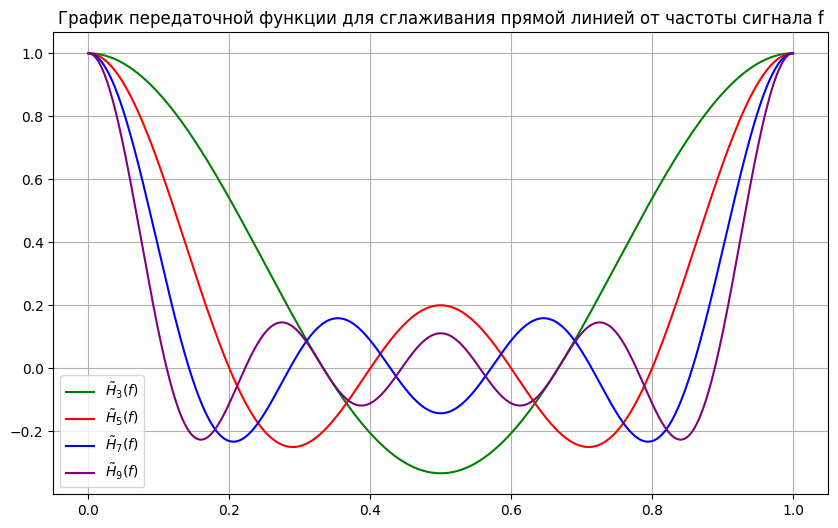

In [2]:
def model_transfer_function_for_straight_line_smoothing(f, m):
    result = np.zeros_like(f)
    result += 1
    for i in range(1, m + 1):
        result += 2 * np.cos(2* i * np.pi * f)
    result /= 2 * m + 1
    return result



def plot_for_transfer_function(frequences, transfer_function, label, numbers):
    plt.figure(figsize=(10, 6))
    for i in numbers:
        plt.plot(frequences, transfer_function(frequences,i), color=colors[numbers.index(i)], label=f'$\\tilde{{H}}_{{{2 * i + 1}}}(f)$')
    plt.title(label)
    plt.grid(True)
    plt.legend()
    plt.show()
    
plot_for_transfer_function(frequences, model_transfer_function_for_straight_line_smoothing, "График передаточной функции для сглаживания прямой линией от частоты сигнала f", numbers_for_straight_line_smoothing)


Исходя из графика, можно сказать, что передаточная функция $\tilde{H}(f)$ является периодической функцией с периодом, равным $1 Hz$, в течение одного периода встречается столько экстремумов, по скольким точкам проводилось сглаживание. Также с увеличением числа точек уменьшается амплитуда колебаний, которые происходят при нецелых значениях частоты $f$, становится быстрее затухание для нецелых значений $f$.

Таким образом, если отмасштабировать имеющийся диапазон частот сигнала в промежуток $[0, 0.5] Hz$, а затем посчитать значения передаточной функции для отмасштабированных значений, то получится, что передаточная функция при сглаживании больше, чем по 5 точкам, будет резко затухать.

### Задание 2

При сглаживании полиномом второй степени выходной сигнал задается формулой: $y(t) = A + Bt + C t^2$. С помощью МНК можно найти значение параметра $A$. Общее решение для $2m+1$ точек приведено ниже.

Входной сигнал: $s(t)$

$$F(A, B, C) = \sum_{k = - m}^{m} (s_k - y_k)^2 = \sum_{k = - m}^{m} (s_k - A - Bk - C k^2)^2 => min$$

Нужно минимизировать значение функции $F(A, B, C)$, для этого нужно найти производную этой функции по A и C, приравнять их нулю:

$\frac{\delta F(A, B, C)}{\delta A} =-2\sum_{k = - m}^{m} (s_k - A - Bk - C k^2) = -2\sum_{k = - m}^{m} s_k + 2\sum_{k = - m}^{m} A + 2\sum_{k = - m}^{m} Bk + 2\sum_{k = - m}^{m} C k^2 = 0 = -2\sum_{k = - m}^{m} s_k + 2\sum_{k = - m}^{m} A + 2\sum_{k = - m}^{m} C k^2 = 0$

$$\sum_{k = - m}^{m} s_k = \sum_{k = - m}^{m} A + \sum_{k = - m}^{m} C k^2 = \sum_{k = - m}^{m} A + C k^2$$

Из данного выражения можно выразить $C$ через $A$ и $s_k$:

$$\sum_{k = - m}^{m} C k^2 = \sum_{k = - m}^{m} s_k - (2m+1)A$$

Так как $\sum_{k = - m}^{m} k^2 = 2\frac{m(m+1)(2m+1)}{6} = \frac{m(m+1)(2m+1)}{3}$, то:

$$ C = \frac{3(\sum_{k = - m}^{m} s_k - (2m+1)A)}{m(m+1)(2m+1)} $$

Теперь нужно расмотреть выражение $ \frac{\delta F(A, B, C)}{\delta C} $:

$ \frac{\delta F(A, B, C)}{\delta C} = -2\sum_{k = - m}^{m} (s_k - A - Bk - C k^2)k^2 = -2\sum_{k = - m}^{m} s_k k^2 + 2\sum_{k = - m}^{m} A k^2 + 2\sum_{k = - m}^{m} Bk^3 + 2\sum_{k = - m}^{m} C k^4= -2\sum_{k = - m}^{m} s_k k^2 + 2\sum_{k = - m}^{m} A k^2 + 2\sum_{k = - m}^{m} C k^4 = 0 $

$$ \sum_{k = - m}^{m} s_k k^2 = \sum_{k = - m}^{m} A k^2 + \sum_{k = - m}^{m} C k^4 $$

Так как $ \sum_{k = - m}^{m} k^4 = 2\frac{m(m+1)(2m+1)(3m^2 + 3m - 1)}{30} = \frac{m(m+1)(2m+1)(3m^2 + 3m - 1)}{15} $, то

$$ \sum_{k = - m}^{m} s_k k^2 =\frac{m(m+1)(2m+1)}{3} A + \frac{m(m+1)(2m+1)(3m^2 + 3m - 1)}{15} \frac{3(\sum_{k = - m}^{m} s_k - (2*m+1)A)}{m(m+1)(2m+1)} $$

$$ \sum_{k = - m}^{m} s_k k^2=\frac{m(m+1)(2m+1)}{3} A + \frac{3(\sum_{k = - m}^{m} s_k - (2m+1)A)(3m^2 + 3m - 1)}{15} $$

$$ \frac{m(m+1)(2m+1)}{3} A - \frac{(3m^2 + 3m - 1)(2m + 1)A}{5} = \sum_{k = - m}^{m} s_k k^2 - \frac{(3m^2 + 3m - 1)\sum_{k = - m}^{m} s_k}{5} $$

$$ A (\frac{5m(m+1)(2m+1) - 3(2m+1)(3m^2 + 3m - 1)}{15}) = \frac{5\sum_{k = - m}^{m} s_k k^2 -  (3m^2 + 3m - 1)\sum_{k = - m}^{m} s_k}{5} $$

$$ A =  \frac{15\sum_{k = - m}^{m} s_k k^2 - 3(3m^2 + 3m - 1)\sum_{k = - m}^{m} s_k}{5m(m+1)(2m+1) - 3(2m+1)(3m^2 + 3m - 1)} $$

$y_0 = A$, тогда в общем виде формула имеет вид:

$$ y_n = \frac{15\sum_{k = - m}^{m} s_{n+k} k^2 - 3(3m^2 + 3m - 1)\sum_{k = - m}^{m} s_{n+k}}{5m(m+1)(2m+1) - 3(2m+1)(3m^2 + 3m - 1)} $$

Так как $s_{n+k}$ нужно подставить $e^{i\omega(n+k)}$:

$$ y_n = \frac{15\sum_{k = - m}^{m} e^{i\omega(n+k)} k^2 - 3(3m^2 + 3m - 1)\sum_{k = - m}^{m} e^{i\omega(n+k)}}{5m(m+1)(2m+1) - 3(2m+1)(3m^2 + 3m - 1)} $$

Можно вынести $e^{i\omega n}$, и тогда можно выделить форму передаточной функции:

$$ y_n = H(\omega)e^{i\omega n} $$

$$ H(\omega) = \frac{15\sum_{k = - m}^{m} e^{i\omega k} k^2 - 3(3m^2 + 3m - 1)\sum_{k = - m}^{m} e^{i\omega k}}{5m(m+1)(2m+1) - 3(2m+1)(3m^2 + 3m - 1)} $$

Можно упростить эту формулу, результат представлен ниже:

$$ H(\omega) =  \frac{30 \sum_{k = 1}^{m}\cos(\omega k) k^2 - 3(3m^2 + 3m - 1)(2(\sum_{k = 1}^{m}\cos(\omega k)) + 1)}{-8m^3 - 12m^2 + 2m + 3}$$

Тогда

$$ \tilde{H}(f) =  \frac{30 \sum_{k = 1}^{m}\cos(2 \pi f k) k^2 - 3(3m^2 + 3m - 1)(2(\sum_{k = 1}^{m}\cos(2 \pi f k)) + 1)}{-8m^3 - 12m^2 + 2m + 3}$$

Формула для $\tilde{H}(f)$ при сглаживании полиномом второй степени по 7 точкам$(m = 3)$:

$ \tilde{H}(f) =  \frac{30 \sum_{k = 1}^{3}\cos(2 \pi f k) k^2 - 105 (2\sum_{k = 1}^{3}\cos(2 \pi f k) + 1)}{-315} = \frac{30\cos(2\pi f) + 120\cos(4\pi f) + 270\cos(6\pi f) - 210 \cos(2\pi f) - 210\cos(4 \pi f) - 210 \cos(6 \pi f) - 105}{-315} = \frac{180\cos(2\pi f) + 90\cos(4\pi f) - 60\cos(6\pi f) + 105}{-315} = \frac{1}{21} (12\cos(2\pi f) + 6\cos(4\pi f) - 4\cos(6\pi f) + 7)$

Формула для $\tilde{H}(f)$ при сглаживании полиномом второй степени по 9 точкам$(m = 4)$:

$ \tilde{H}(f) =  \frac{30 \sum_{k = 1}^{4}\cos(2 \pi f k) k^2 - 177 (2\sum_{k = 1}^{4}\cos(2 \pi f k) + 1)}{-693}  = \frac{30\cos(2\pi f) + 120\cos(4\pi f) + 180\cos(6\pi f) + 480 \cos(8\pi f) - 354\cos(2\pi f) - 354\cos(4\pi f) - 354\cos(6\pi f) - 354\cos(8\pi f) - 177}{-693} = \frac{324\cos(2\pi f) + 234\cos(4\pi f) + 174\cos(6\pi f) - 126\cos(8\pi f) + 177}{693} = \frac{1}{231}(108\cos(2\pi f) + 78\cos(4\pi f) + 58\cos(6\pi f) - 42\cos(8\pi f) + 59)$

Формула для $\tilde{H}(f)$ при сглаживании полиномом второй степени по 11 точкам$(m = 5)$:

$\tilde{H}(f) =  \frac{30 \sum_{k = 1}^{5}\cos(2 \pi f k) k^2 - 267 (2\sum_{k = 1}^{5}\cos(2 \pi f k) + 1)}{-1287} = \frac{30\cos(2\pi f) + 120\cos(4\pi f) + 180\cos(6\pi f) + 480 \cos(8\pi f) + 750 \cos(10\pi f) - 534\cos(2\pi f) - 534\cos(4\pi f) - 534\cos(6\pi f) - 534\cos(8\pi f) - 534\cos(10\pi f) - 267}{-1287} = \frac{504\cos(2\pi f) + 414\cos(4\pi f) + 264\cos(6\pi f) + 54\cos(8\pi f) - 216\cos(10\pi f) + 267}{1287} = \frac{1}{429}(168\cos(2\pi f) + 138\cos(4\pi f) + 88\cos(6\pi f) + 18\cos(8\pi f) - 72\cos(10\pi f) + 89) $

Формула для $\tilde{H}(f)$ при сглаживании полиномом второй степени по 13 точкам$(m = 6)$:

$ \tilde{H}(f) =  \frac{30 \sum_{k = 1}^{6}\cos(2 \pi f k) k^2 - 375 (2\sum_{k = 1}^{6}\cos(2 \pi f k) + 1)}{-2145} = \frac{30\cos(2\pi f) + 120\cos(4\pi f) + 180\cos(6\pi f) + 480 \cos(8\pi f) + 750 \cos(10\pi f) + 1080 \cos(12 \pi f) - 750 \cos(2\pi f) - 750 \cos(4\pi f) - 750 \cos(6\pi f) - 750 \cos(8\pi f) - 750 \cos(10\pi f) - 750 \cos(12 \pi f) - 375}{-2145} = \frac{-720 \cos(2\pi f) - 630 \cos(4\pi f) - 480 \cos(6\pi f) - 270 \cos(8\pi f) + 330 \cos(12 \pi f) - 375}{-2145} = \frac{1}{143}( 48 \cos(2\pi f) + 42 \cos(4\pi f) + 32 \cos(6\pi f) + 18 \cos(8\pi f) - 22 \cos(12 \pi f) + 25)$


Ниже представлена программа, которая выводит графики $\tilde{H}(f)$ для нерекурсивного фильтра, соотвествующего сглаживанию полиномом второй степени по 7, 9, 11, 13 точкам.


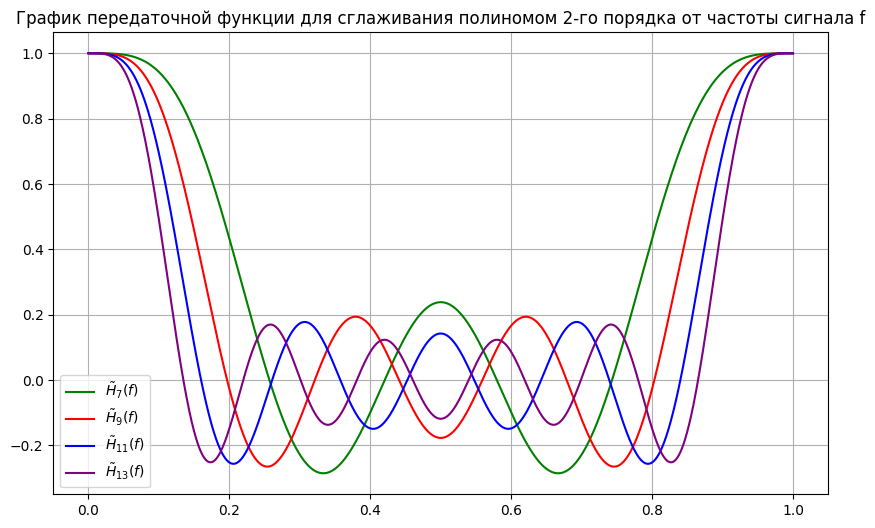

In [3]:
def model_transfer_function_for_polynomial2_smoothing(f, m):
    result = np.zeros_like(f)
    sum1 = np.zeros_like(f)
    for i in range(1, m + 1):
        sum1 += np.cos(2* i * np.pi * f) * (i ** 2)
    sum2 = np.zeros_like(f)
    for i in range(1, m + 1):
        sum2 += np.cos(2* i * np.pi * f)    
    result = (30 * sum1 - 3 * (3 * m ** 2 + 3 * m - 1) * (2 * sum2 + 1)) / (-8 * m ** 3 - 12 * m ** 2 + 2 * m + 3)
    return result

plot_for_transfer_function(frequences, model_transfer_function_for_polynomial2_smoothing, "График передаточной функции для сглаживания полиномом 2-го порядка от частоты сигнала f", numbers_for_polynomial2_smoothing)


Исходя из графика, можно сказать, что передаточная функция $\tilde{H}(f)$ является периодической функцией с периодом, равным $1 Hz$, как и при сглаживании прямой линией. Также с увеличением числа точек уменьшается амплитуда колебаний, которые происходят при нецелых значениях частоты $f$, становится быстрее затухание для нецелых значений $f$. Существенное отличие сглаживания полиномом 2 степени от сглаживания прямой линией состоит в том, что в данном случае затухание частот, чьи значения близки к целым, происходит не так резко, как было бы при таких же параметрах при сглаживании прямой линией.


Таким образом, если отмасштабировать имеющийся диапазон частот сигнала в промежуток $[0, 0.5] Hz$, а затем посчитать значения передаточной функции для отмасштабированных значений, то получится, что передаточная функция будет затухать не так резко и будет оставлять чуть больший диапазон частот, чем при сглаживании прямой линией.

### Задание 3

При сглаживании полиномом второй степени выходной сигнал задается формулой: $y(t) = A + Bt + C t^2 + D t ^ 3 + E t ^ 4$. С помощью МНК можно найти значение параметра $A$. Общее решение для $2m+1$ точек приведено ниже.

Входной сигнал: $s(t)$

$$F(A, B, C, D, E) = \sum_{k = - m}^{m} (s_k - y_k)^2 = \sum_{k = - m}^{m} (s_k - A - Bk - C k^2 - D t ^ 3 - E t ^ 4)^2 => min$$

Для того, чтобы найти минимум функции $F(A, B, C, D, E)$ нужно найти частные производные по $A, B, C, D, E$:

$
\frac{\partial F}{\partial A} = 0, \quad \frac{\partial F}{\partial B} = 0, \quad \frac{\partial F}{\partial C} = 0, \quad \frac{\partial F}{\partial D} = 0, \quad \frac{\partial F}{\partial E} = 0
$

Получаем систему уравнений, решение которой позволит найти значения $A, B, C, D, E$, при любых $B, D$ суммы $\sum_{k = - m}^{m} Bk = \sum_{k = - m}^{m} D t ^ 3  = 0$, поэтому в системе уравнений будет всего 3 уравнения

$
\begin{cases}
(2 m + 1)A +  \sum_{k = - m}^{m} k^2 C +  \sum_{k = - m}^{m} k^4 E = \sum_{k = - m}^{m} s_k \\
\sum_{k = - m}^{m} k^2 A + \sum_{k = - m}^{m} k^4 C + \sum_{k = - m}^{m} k^6 E = \sum_{k = - m}^{m} k^2 s_k \\
\sum_{k = - m}^{m} k^4 A + \sum_{k = - m}^{m} k^6 C + \sum_{k = - m}^{m} k^8 E = \sum_{k = - m}^{m} k^4 s_k\\
\end{cases}
$

$
\begin{cases}
(2 m + 1)A +  \frac{m(m+1)(2m+1)}{3} C +  \frac{m(m+1)(2m+1)(3m^2 + 3m -1)}{15} E = \sum_{k = - m}^{m} s_k \\
\frac{m(m+1)(2m+1)}{3} A + \frac{m(m+1)(2m+1)(3m^2 + 3m -1)}{15} C +  \frac{m(m+1)(2m+1)(3m^4 + 6m^3 - 3m + 1)}{21} E = \sum_{k = - m}^{m} k^2 s_k \\
 \frac{m(m+1)(2m+1)(3m^2 + 3m -1)}{15} A + \frac{m(m+1)(2m+1)(3m^4 + 6m^3 - 3m + 1)}{21} C + \frac{m(m+1)(2m+1)(5m^6 + 15m^5 + 5m^4 - 15m^3 - m^2 + 9m - 3)}{45} E = \sum_{k = - m}^{m} k^4 s_k\\
\end{cases}
$

Можно выразить из уравнения 1 параметр $C$, результат представлен ниже:

$C = \frac{15\sum_{k = - m}^{m} s_k - 30mA - 15A - 6m^5E - 15m^4E - 10m^3E + mE}{5m(m+1)(2m+1)}$

Затем, если подставить это выражение в уравнение 2, то получится:

$\frac{m(m+1)(2m+1)}{3} A + \frac{(3m^2 + 3m -1)(15\sum_{k = - m}^{m} s_k - 30mA - 15A - 6m^5E - 15m^4E - 10m^3E + mE)}{75} +  \frac{m(m+1)(2m+1)(3m^4 + 6m^3 - 3m + 1)}{21} E = \sum_{k = - m}^{m} k^2 s_k $

Если привести к общему знаменателю и упростить, то получится следующее:

$\frac{-35A(2m+1)(2m+3)(2m-1) + 3E(m(m^3+2m^2-m-2)(8m^3+12m^2-2m-3)) + 105(3m^2 + 3m -1)\sum_{k = - m}^{m} s_k}{525} = \sum_{k = - m}^{m} k^2 s_k$

Из данного выражения можно выразить $E$:

$E = 35\frac{15\sum_{k = - m}^{m} k^2 s_k + A(2m+1)(2m+3)(2m-1) - 3(3m^2 + 3m -1)\sum_{k = - m}^{m} s_k}{3m(m^3+2m^2-m-2)(8m^3+12m^2-2m-3)}$

Если подставить это выражение в уравнение 3, а затем из полученного выражения выразить $A$, то получится следующее:

$A = \frac{15}{4(2m-3)(2m-1)(2m+1)(2m+3)(2m+5)}((15m^4 + 30m^3 - 35m^2 - 50m + 12)\sum_{k = - m}^{m} s_k - 35(2m^2 + 2m - 3)\sum_{k = - m}^{m} k^2 s_k + 63\sum_{k = - m}^{m} k^4 s_k)$

Так как $y_0 = A$, то можно получить общую формулу для $y_n$:

$y_n = \frac{15}{4(2m-3)(2m-1)(2m+1)(2m+3)(2m+5)}((15m^4 + 30m^3 - 35m^2 - 50m + 12)\sum_{k = - m}^{m} s_{n + k} - 35(2m^2 + 2m - 3)\sum_{k = - m}^{m} k^2 s_{n + k} + 63\sum_{k = - m}^{m} k^4 s_{n + k})$

Так как $y_n = H(\omega)e^{i\omega n}, s_n = e^{i\omega n}$, то передаточная функция:

$H(\omega) = \frac{15}{4(2m-3)(2m-1)(2m+1)(2m+3)(2m+5)}((15m^4 + 30m^3 - 35m^2 - 50m + 12)\sum_{k = - m}^{m} e^{i\omega k} - 35(2m^2 + 2m - 3)\sum_{k = - m}^{m} k^2 e^{i\omega k} + 63\sum_{k = - m}^{m} k^4 e^{i\omega k})$

Если применить формулу Эйлера, то получится следующее:

$H(\omega) = \frac{15}{4(2m-3)(2m-1)(2m+1)(2m+3)(2m+5)}((15m^4 + 30m^3 - 35m^2 - 50m + 12)(2(\sum_{k = 0}^{m} \cos(\omega k)) + 1) - 70(2m^2 + 2m - 3)\sum_{k = 0}^{m} k^2 \cos(\omega k) + 126\sum_{k = 0}^{m} k^4 \cos(\omega k))$

$\omega = 2\pi f$, тогда можно получить общую формулу для $\tilde{H}(f)$:

$\tilde{H}(f) = \frac{15}{4(2m-3)(2m-1)(2m+1)(2m+3)(2m+5)}((15m^4 + 30m^3 - 35m^2 - 50m + 12)(2(\sum_{k = 0}^{m} \cos(2\pi f k)) + 1) - 70(2m^2 + 2m - 3)\sum_{k = 0}^{m} k^2 \cos(2\pi f k) + 126\sum_{k = 0}^{m} k^4 \cos(2\pi f k))$

Формула для $\tilde{H}(f)$ при сглаживании полиномом четвертой степени по 9 точкам$(m = 4)$:

$\tilde{H}(f) = \frac{1}{429}(179 + 270\cos(2\pi f) + 60\cos(4 \pi f) - 110\cos(6 \pi f) + 30\cos(8 \pi f))$

Формула для $\tilde{H}(f)$ при сглаживании полиномом четвертой степени по 11 точкам$(m = 5)$:

$\tilde{H}(f) = \frac{1}{429}(143 + 240\cos(2\pi f) + 120\cos(4 \pi f) - 20\cos(6 \pi f) - 90\cos(8 \pi f) + 36\cos(10 \pi f))$

Формула для $\tilde{H}(f)$ при сглаживании полиномом четвертой степени по 13 точкам$(m = 6)$:

$\tilde{H}(f) = \frac{1}{2431}(677 + 1200\cos(2\pi f) + 780\cos(4 \pi f) + 220\cos(6 \pi f) - 270\cos(8 \pi f) - 396\cos(10 \pi f) + 220\cos(12 \pi f))$

Формула для $\tilde{H}(f)$ при сглаживании полиномом четвертой степени по 15 точкам$(m = 7)$:

$\tilde{H}(f) = \frac{1}{46189}(11063 + 20250\cos(2\pi f) + 15000\cos(4 \pi f) + 7510\cos(6 \pi f) - 330\cos(8 \pi f) - 5874\cos(10 \pi f) + 5720\cos(12 \pi f) + 4290 \cos(14 \pi f))$

Ниже представлена программа, которая выводит графики $\tilde{H}(f)$ для нерекурсивного фильтра, соотвествующего сглаживанию полиномом четвертой степени по 9, 11, 13, 15 точкам.

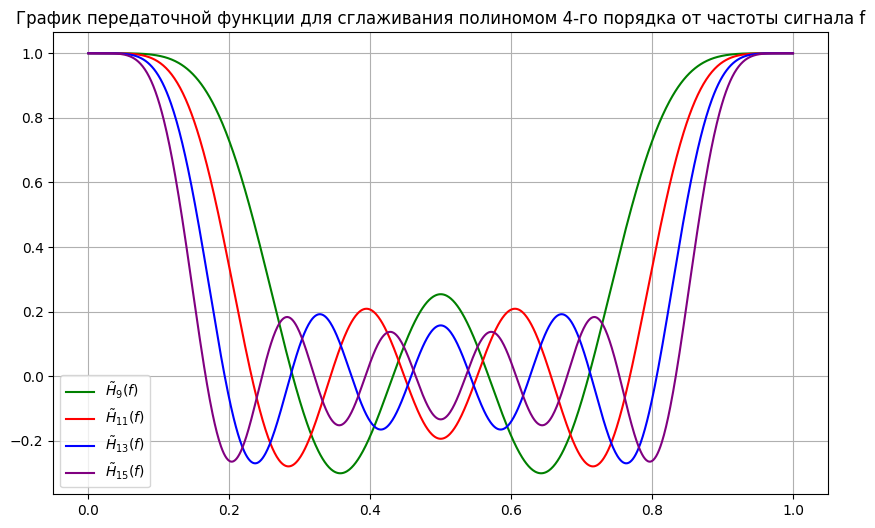

In [4]:
def model_transfer_function_for_polynomial4_smoothing(f, m):
    result = np.zeros_like(f)
   
    denominator = 4 * (2 * m - 3) * (2 * m - 1) * (2 * m + 1) * (2 * m + 3) * (2 * m + 5)
    coefficient1 = 15 * m ** 4 + 30 * m ** 3 - 35 * m ** 2 - 50 * m + 12
    coefficient2 = 70 * (2 * m ** 2 + 2 * m - 3)
    coefficient3 = 126
    sum1 = np.zeros_like(f)
    for i in range(1, m + 1):
        sum1 += np.cos(2* i * np.pi * f) 
    sum2 = np.zeros_like(f)
    for i in range(1, m + 1):
        sum2 += np.cos(2* i * np.pi * f) * (i ** 2)    
    sum3 = np.zeros_like(f)
    for i in range(1, m + 1):
        sum3 += np.cos(2* i * np.pi * f) * (i ** 4)
    result = 15 * (coefficient1 * (2 * sum1 + 1) - coefficient2 * sum2 + coefficient3 * sum3) / denominator
    return result

plot_for_transfer_function(frequences, model_transfer_function_for_polynomial4_smoothing, "График передаточной функции для сглаживания полиномом 4-го порядка от частоты сигнала f", numbers_for_polynomial4_smoothing)


Исходя из графика, можно сказать, что передаточная функция $\tilde{H}(f)$ является периодической функцией с периодом, равным $1 Hz$, как и при сглаживании прямой линией и полиномом 2 степени. Также с увеличением числа точек уменьшается амплитуда колебаний, которые происходят при нецелых значениях частоты $f$, становится быстрее затухание для нецелых значений $f$. Существенное отличие сглаживания полиномом 4 степени от сглаживания 2 степени состоит в том, что больший диапазон частот около 0 и 1 остается нетронутыс, то есть затухание вблизи 0 не такое резкое, как в предыдущих двух видах сглаживания.

Таким образом, если отмасштабировать имеющийся диапазон частот сигнала в промежуток $[0, 0.5] Hz$, а затем посчитать значения передаточной функции для отмасштабированных значений, то получится, что передаточная функция при сглаживании полиномом 4 степени будет принимать значение $\tilde{H}(f) = 1$ на большем промежутке, чем в случае сглаживания полиномом 2 степени.

### Задание 4

При сглаживании формулами Спенсера по 15 и 21 точкам формулы для выходного сигнала следующие:

$m = 7 (15 точек) : y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$

$m = 10 (21 точка) : y_n = \frac{1}{350} (-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} -2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - s_{n+10})$

Формулы для передаточных функций нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам представлены ниже:

$m = 7 (15 точек) : H(\omega) = \frac{1}{320} (-3s_{-7} - 6s_{-6} - 5s_{-5} + 3s_{-4} + 21s_{-3} + 46s_{-2} + 67s_{-1} + 74 + 67s_{1} + 46s_{2} + 21s_{3} + 3s_{4} - 5s_{5} - 6s_{6} - 3s_{7})$

$m = 10 (21 точка) : H(\omega) = \frac{1}{350} (-s_{-10} - 3s_{-9} - 5s_{-8} - 5s_{-7} -2s_{-6} + 6s_{-5} + 18s_{-4} + 33s_{-3} + 47s_{-2} + 57s_{-1} + 60 + 57s_{1} + 47s_{2} + 33s_{3} + 18s_{4} + 6s_{5} - 2s_{6} - 5s_{7} - 5s_{8} - 3s_{9} - s_{10})$

Если учесть, что $s_k = e^{i\omega k}$, и применить формулу Эйлера, то можно упростить данные формулы:

$m = 7 (15 точек) : H(\omega) = \frac{1}{320} (-6\cos(7\omega) - 12\cos(6\omega) - 10\cos(5\omega) + 6\cos(4\omega) + 42\cos(3\omega) + 92\cos(2\omega) + 134\cos(\omega) + 74)$

$m = 10 (21 точка) : H(\omega) = \frac{1}{350} (-2\cos(10\omega) - 6\cos(9\omega) - 10\cos(8\omega) - 10\cos(7\omega) - 4\cos(6\omega) + 12\cos(5\omega) + 36\cos(4\omega) + 66\cos(3\omega) + 94\cos(2\omega) + 114\cos(\omega) + 60)$

Так как $\omega = 2\pi f$, то формулы $\tilde{H}(f)$ будут выглядеть следующим образом:

$m = 7 (15 точек) : \tilde{H}(f) = \frac{1}{320} (-6\cos(14 \pi f) - 12\cos(12 \pi f) - 10\cos(10\pi f) + 6\cos(8 \pi f) + 42\cos(6\pi f) + 92\cos(4\pi f) + 134\cos(2 \pi f) + 74)$

$m = 10 (21 точка) : \tilde{H}(f) = \frac{1}{350} (-2\cos(20 \pi f) - 6\cos(18 \pi f) - 10\cos(16 \pi f) - 10\cos(14 \pi f) - 4\cos(12 \pi f) + 12\cos(10 \pi f) + 36\cos(8 \pi f) + 66\cos(6 \pi f) + 94\cos(4 \pi f) + 114\cos(2 \pi f) + 60)$

Ниже представлена программа, которая выводит графики $\tilde{H}(f)$ для нерекурсивного фильтра, соотвествующего сглаживанию по формулам Спенсера по 15 и 21 точкам.


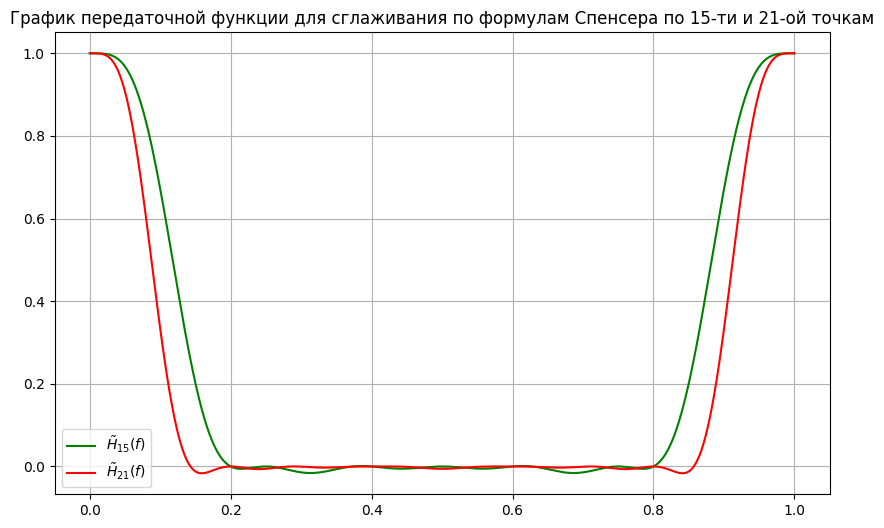

In [5]:
def model_transfer_function_for_Spenser_smoothing(f, m):
    result = np.zeros_like(f)
    if m == 7:
        result = (1 / 320) * (
            -6 * np.cos(14 * np.pi * f) 
            - 12 * np.cos(12 * np.pi * f)
            - 10 * np.cos(10 * np.pi * f) 
            + 6 * np.cos(8 * np.pi * f) 
            + 42 * np.cos(6 * np.pi * f) 
            + 92 * np.cos(4 * np.pi * f) 
            + 134 * np.cos(2 * np.pi * f) 
            + 74
        )
    elif m == 10:
        result = (1 / 350) * (
            -2 * np.cos(20 * np.pi * f)
            - 6 * np.cos(18 * np.pi * f)
            - 10 * np.cos(16 * np.pi * f)
            - 10 * np.cos(14 * np.pi * f)
            - 4 * np.cos(12 * np.pi * f)
            + 12 * np.cos(10 * np.pi * f)
            + 36 * np.cos(8 * np.pi * f)
            + 66 * np.cos(6 * np.pi * f)
            + 94 * np.cos(4 * np.pi * f)
            + 114 * np.cos(2 * np.pi * f)
            + 60
        )
        
    return result

plot_for_transfer_function(frequences, model_transfer_function_for_Spenser_smoothing, "График передаточной функции для сглаживания по формулам Спенсера по 15-ти и 21-ой точкам", numbers_for_Spenser_smoothing)

Исходя из графика, можно сказать, что передаточная функция $\tilde{H}(f)$ является периодической функцией с периодом, равным $1 Hz$, как и при предыдущих видах сглаживания. Невооруженным глазом видно, что данный метод сглаживания лучше всех справляется с шумом, так как амплитуда колебаний, которые происходят при нецелых значениях частоты $f$, очень близка к 0.

Таким образом, если отмасштабировать имеющийся диапазон частот сигнала в промежуток $[0, 0.5] Hz$, а затем посчитать значения передаточной функции для отмасштабированных значений, то получится, что передаточная функция при данном методе сглаживания лучше всех справляется с шумом, также передаточная функция затухает не так резко, как при сглаживании прямой линией, но резче, чем при сглаживании полиномом 4 степени, таким образом при данном методе сглаживания передаточная функция будет сильнее фильтровать высокие частоты.

### Задание 5

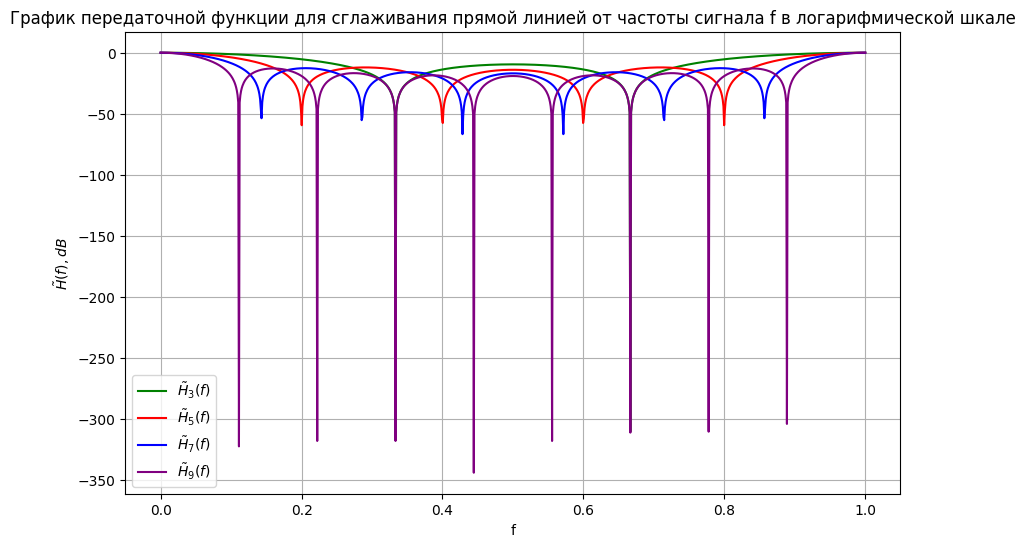

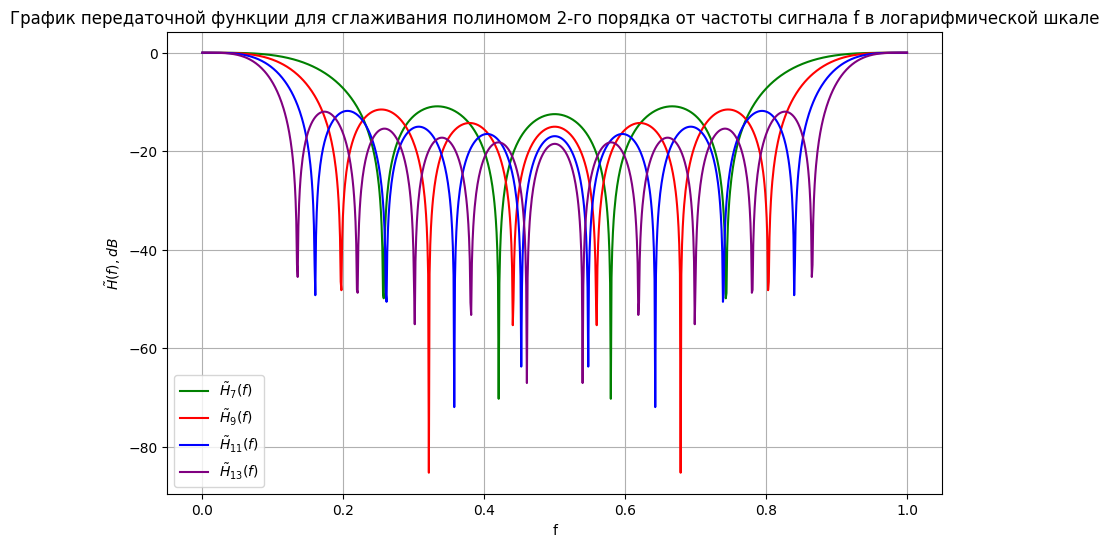

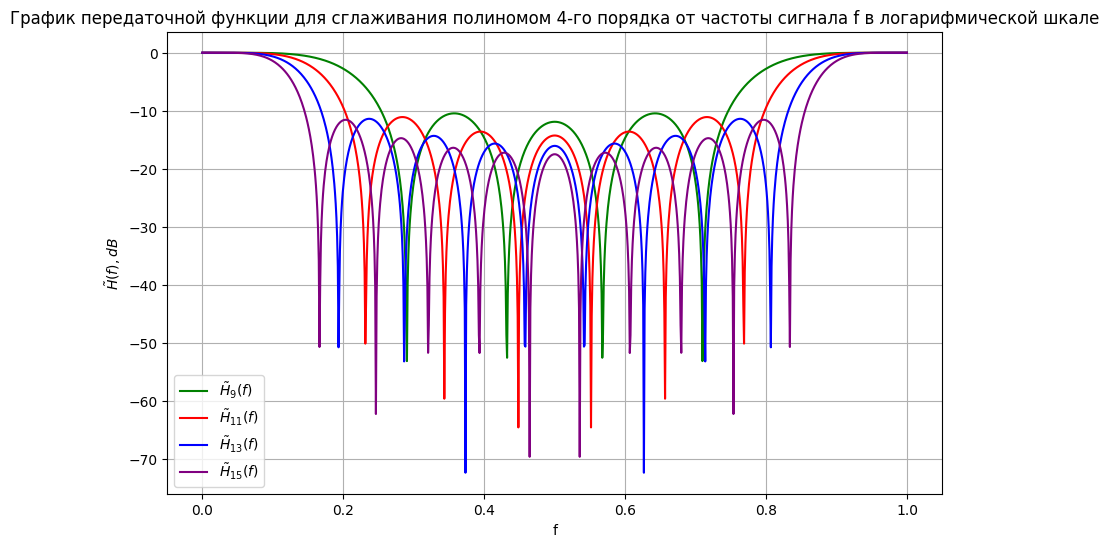

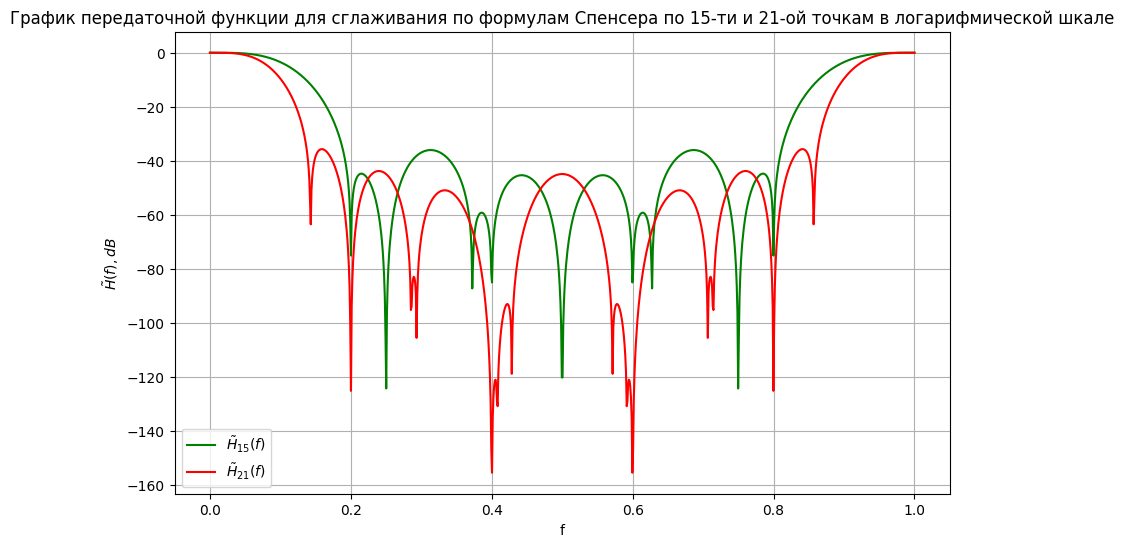

In [6]:
def plot_for_transfer_function_to_dВ(frequences, transfer_function, label, numbers):
    plt.figure(figsize=(10, 6))
    for i in numbers:
        plt.plot(frequences, model_logagithmic_scale(transfer_function, frequences, i), color=colors[numbers.index(i)], label=f'$\\tilde{{H}}_{{{2 * i + 1}}}(f)$')
    plt.xlabel('f')
    plt.ylabel(f'$\\tilde{{H}}(f), dB$')
    plt.title(label)
    plt.grid(True)
    plt.legend()
    plt.show()
    
    
def model_logagithmic_scale(model_transfer_function, frequences, m):
    transfer_function = model_transfer_function(frequences, m)
    result = np.zeros_like(transfer_function)
    result = 20 * np.log10(np.abs(transfer_function))
    return result
    
plot_for_transfer_function_to_dВ(frequences, model_transfer_function_for_straight_line_smoothing, "График передаточной функции для сглаживания прямой линией от частоты сигнала f в логарифмической шкале", numbers_for_straight_line_smoothing)

plot_for_transfer_function_to_dВ(frequences, model_transfer_function_for_polynomial2_smoothing, "График передаточной функции для сглаживания полиномом 2-го порядка от частоты сигнала f в логарифмической шкале", numbers_for_polynomial2_smoothing)

plot_for_transfer_function_to_dВ(frequences, model_transfer_function_for_polynomial4_smoothing, "График передаточной функции для сглаживания полиномом 4-го порядка от частоты сигнала f в логарифмической шкале", numbers_for_polynomial4_smoothing)

plot_for_transfer_function_to_dВ(frequences, model_transfer_function_for_Spenser_smoothing, "График передаточной функции для сглаживания по формулам Спенсера по 15-ти и 21-ой точкам в логарифмической шкале", numbers_for_Spenser_smoothing)


Графики, представленные в логарифмической шкале, более эффективно отображают соотношения амплитуд на разных частотах, чем линейные графики, где видны только абсолютные значения. Применение логарифмирования к передаточным функциям позволяет более четко видеть мелкие изменения на высоких частотах и наглядно демонстрирует уровень изменений, которые проявляются в резких спадах графиков.

### Задание 6

Были построены графики для передаточных функций, они демонстрируют следующее:

- При сглаживании прямой линией (первый порядок) с увеличением числа точек (3, 5, 7, 9) фильтр лучше подавляет высокочастотные составляющие и даёт плавный переход от пропускания к подавлению.
- Полином второго порядка пропускает низкие частоты шире, чем линейный фильтр, и эффективно подавляет высокие. Большее число точек (7, 9, 11, 13) делает этот переход более плавным.
- Полином четвёртого порядка оставляет очень узкую полосу пропускания, то есть позволяет проходить только низким частотам, что помогает подавлять шум. Увеличение числа точек (9, 11, 13, 15) делает переход резче.
- Когда количество точек сглаживания увеличивается, передаточная функция меняется быстрее, а амплитуда боковых колебаний уменьшается.
- Чем выше порядок полинома, тем шире диапазон частот, где передаточная функция остаётся близкой к единице. Это помогает лучше сохранять низкочастотные сигналы и подавлять высокочастотные.
- Формулы Спенсера ведут себя иначе. После быстрого снижения амплитуды до нуля возникают низкоамплитудные колебания, что отличает их от сглаживания полиномами низкого порядка.
- Ширина основного максимума для линейного сглаживания самая узкая и уменьшается при увеличении числа точек (3, 5, 7, 9). У полинома второго порядка она шире и также увеличивается с числом точек (7, 9, 11, 13). Полином четвёртого порядка даёт ещё большую ширину, а для формул Спенсера она сравнима с линейным сглаживанием при аналогичном количестве точек (15, 21).
- Амплитуда основного пика остаётся равной единице для всех.
- Затухание боковых максимумов самое медленное у линейного сглаживания с заметными колебаниями. У полинома второго порядка затухание происходит быстрее, но колебания всё ещё есть. Полином четвёртого порядка затухает быстрее, а формулы Спенсера дают наименьшие колебания и самое быстрое затухание.

Таким образом, можно сделать следующие выводы:
- Увеличение числа точек позволяет лучше подавлять высокие частоты и уменьшает полосу пропускания.
- Полиномы более высоких порядков сильнее фильтруют низкие частоты и дают резкий переход от пропускания к подавлению.
- Формулы Спенсера обеспечивают быстрое затухание колебаний и хорошо подавляют высокочастотные составляющие.


## Вывод

В ходе лабораторной работы были построены и проанализированы частотные характеристики различных типов нерекурсивных фильтров, использующих полиномиальное сглаживание. Рассматривались методы сглаживания с помощью прямой линии, полиномов второго и четвертого порядка, а также фильтры, созданные по формулам Спенсера. Анализ показал, как количество точек и порядок полинома влияют на ширину полосы пропускания, уровень подавления высокочастотных составляющих и появление боковых колебаний.

Исследование частотных свойств этих фильтров продемонстрировало, что увеличение числа точек и порядка полинома позволяет лучше сохранять низкочастотные сигналы, делая сглаживание более эффективным в подавлении высокочастотного шума. В особенности фильтры на основе формул Спенсера продемонстрировали быстрое затухание и минимальные боковые колебания, что делает их подходящими для задач, требующих высокой точности фильтрации и минимального искажения сигнала.

Кроме того, построение графиков в линейном и логарифмическом масштабах позволило глубже проанализировать частотные характеристики. Логарифмическая шкала оказалась полезной для детального изучения высокочастотного затухания и анализа переходных областей, особенно в фильтрах более высокого порядка, где затухание становится более резким.

Эта работа подчеркнула важность выбора подходящего метода сглаживания в зависимости от задач анализа временных рядов. Полиномиальное сглаживание показало себя как гибкий инструмент, который можно настроить под различные требования к фильтрации — от сглаживания простых сигналов до точного подавления шумов с сохранением структуры исходного сигнала.